<a href="https://colab.research.google.com/github/Overleaff/Rice_grain_counting/blob/main/scenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/1.png
hatgao1 = "1.png"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/2.png
hatgao2 = "2.png"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/3.png
hatgao3 = "3.png"
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/HW/hatgao/4.png
hatgao4 = "4.png"

hatgao1_img = cv.imread(hatgao1, 0)
hatgao2_img = cv.imread(hatgao2, 0)
hatgao3_img = cv.imread(hatgao3, 0)
hatgao4_img = cv.imread(hatgao4, 0)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k  100  146k    0     0  5053k      0 --:--:-- --:--:-- --:--:-- 5053k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  159k  100  159k    0     0  5709k      0 --:--:-- --:--:-- --:--:-- 5709k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  334k  100  334k    0     0  12.0M      0 --:--:-- --:--:-- --:--:-- 12.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42339  100 42339    0     0  1653k      0 --:--:-- --:--:-- --:--:-- 1653k


In [ ]:
'''def fouier(x):
  dft = cv.dft(np.float32(x),flags = cv.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

  mask = np.zeros(dft.shape[:2], dtype="uint8")

  color = 255
  thickness = -1

  rectangle = cv2.rectangle(mask, (222,230), (223,231), color, thickness)
  rectangle = cv2.rectangle(mask, (238,230), (239,231), color, thickness)
  rectangle = cv2.bitwise_not(rectangle)

  
  masked = cv.bitwise_and(dft_shift, dft_shift, mask=rectangle)

  idft_shift = np.fft.ifftshift(masked)  # Move the frequency domain from the middle to the upper left corner

  ifimg = cv2.idft(idft_shift)#Fourier library function call
  ifimg = 20*np.log(cv2.magnitude(ifimg[:, :,0], ifimg[:, :,1]))#Convert to 0-255
  ifimg = np.abs(ifimg)
  ifimg = np.uint8(ifimg)
  return(ifimg)'''

'def fouier(x):\n  dft = cv.dft(np.float32(x),flags = cv.DFT_COMPLEX_OUTPUT)\n  dft_shift = np.fft.fftshift(dft)\n  magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))\n\n  mask = np.zeros(dft.shape[:2], dtype="uint8")\n\n  color = 255\n  thickness = -1\n\n  rectangle = cv2.rectangle(mask, (222,230), (223,231), color, thickness)\n  rectangle = cv2.rectangle(mask, (238,230), (239,231), color, thickness)\n  rectangle = cv2.bitwise_not(rectangle)\n\n  \n  masked = cv.bitwise_and(dft_shift, dft_shift, mask=rectangle)\n\n  idft_shift = np.fft.ifftshift(masked)  # Move the frequency domain from the middle to the upper left corner\n\n  ifimg = cv2.idft(idft_shift)#Fourier library function call\n  ifimg = 20*np.log(cv2.magnitude(ifimg[:, :,0], ifimg[:, :,1]))#Convert to 0-255\n  ifimg = np.abs(ifimg)\n  ifimg = np.uint8(ifimg)\n  return(ifimg)'

In [ ]:
def fouier(img):
  dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

  rows, cols = img.shape
  crow,ccol = rows/2 , cols/2
# create a mask first, center square is 1, remaining all zeros
  mask = np.ones((rows,cols,2),np.uint8)

  rectangle = cv2.rectangle(mask, (222,230), (223,231), 0, -1) #222-223 230-231
  rectangle = cv2.rectangle(mask, (237,230), (238,231), 0, -1) #237-238 230-231

  fshift = dft_shift*rectangle
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv.idft(f_ishift)

  img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
  return img_back

In [ ]:
def nnorm(x):
  #gauss = cv.GaussianBlur(x,(5,5),0) 
  med = cv2.medianBlur(x, 3)
  med = cv2.medianBlur(med, 3)

#  gauss = cv.GaussianBlur(med,(3,3),0) 
  image_norm = cv2.normalize(med, None, alpha= 0,beta=255, norm_type=cv2.NORM_MINMAX)
  image_norm = np.uint8(image_norm)  
#  equ = cv2.equalizeHist(image_norm)
  return image_norm

In [ ]:
def gammaCorrection(src, gamma):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    res = cv.LUT(src, lookUpTable)
    return res

In [ ]:
'''def tthreshNC(x):
  ret, thresh = cv.threshold(x, 217, 217+3, cv.THRESH_BINARY)

  kernal = np.ones((3, 3), np.uint8)
  erosion = cv2.erode(thresh, kernal, iterations = 2)
  opening = cv2.dilate(erosion, kernal, iterations = 2)
  return opening'''

'def tthreshNC(x):\n  ret, thresh = cv.threshold(x, 217, 217+3, cv.THRESH_BINARY)\n\n  kernal = np.ones((3, 3), np.uint8)\n  erosion = cv2.erode(thresh, kernal, iterations = 2)\n  opening = cv2.dilate(erosion, kernal, iterations = 2)\n  return opening'

In [ ]:
def cannyy(x):
  edge = cv2.Canny(x, 100, 140,3)
  ret2,th2 = cv.threshold(x,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)  
  return th2

In [ ]:
def closing(x):
  thresh = x
  kernal = np.ones((3, 3), np.uint8)
  erosion = cv2.erode(thresh, kernal, iterations = 2)
  return erosion

106
104
108
79


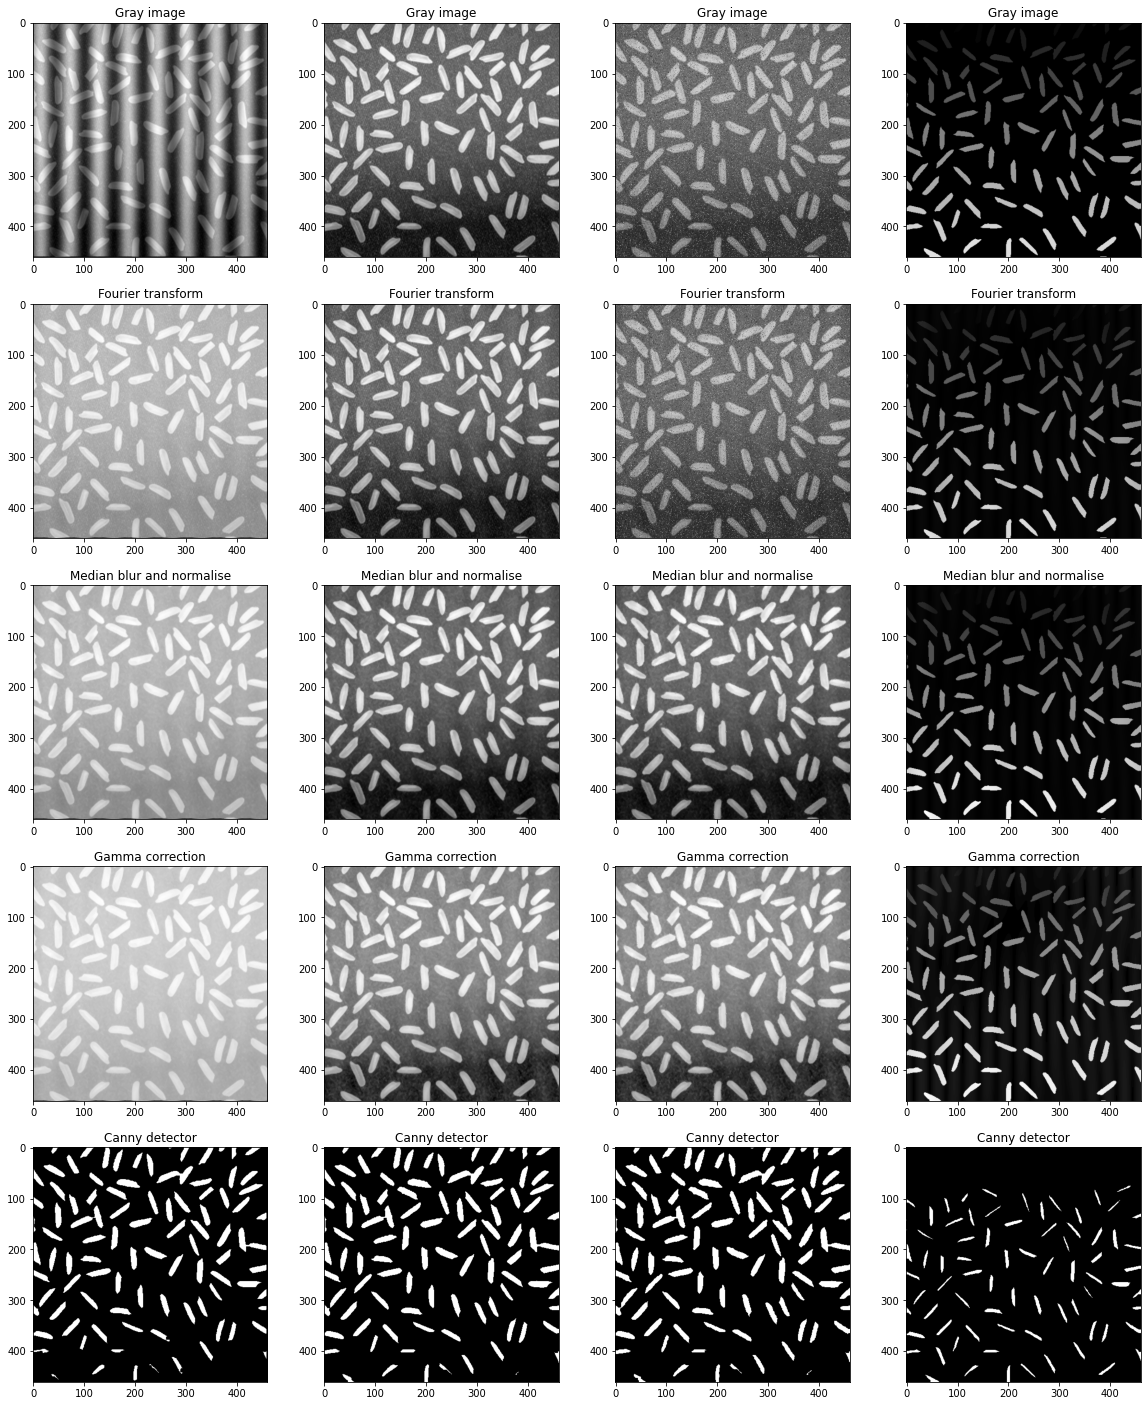

In [ ]:
#initialize array subplot
height = 5
width = 4

f, axarr = plt.subplots(height, width) 
f.set_figheight(height * 5)
f.set_figwidth(width * 5)
####

images = [hatgao1_img, hatgao2_img, hatgao3_img, hatgao4_img]

for x in range(4): 
  axarr[0][x].imshow(images[x], cmap='gray')
  axarr[0][x].title.set_text('Gray image')

  fourier = fouier(images[x])

  axarr[1][x].imshow(fourier, cmap='gray')
  axarr[1][x].title.set_text('Fourier transform')

  norm = nnorm(fourier)
  axarr[2][x].imshow(norm, cmap='gray')
  axarr[2][x].title.set_text('Median blur and normalise')

  gamma = gammaCorrection(norm, 0.67) # 0.67 0.15
  axarr[3][x].imshow(gamma, cmap='gray')
  axarr[3][x].title.set_text('Gamma correction')

  canny = cannyy(gamma)
  close = closing(canny)
  axarr[4][x].imshow(close, cmap='gray')
  axarr[4][x].title.set_text('Canny detector')

  contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  objects = int(str(len(contours)))
  print(objects)
  
plt.show()

# Finding threshold

In [ ]:
#not crop
def tthreshWC(x, offset):
  up = x[0:height, 0:width]
  down = x[height: 461, 0:width]
  for i in range(200,255):
    gamma = gammaCorrection(x, 10)
    ret, thresh = cv.threshold(gamma, i, i+ offset, cv.THRESH_BINARY) # trong khoang thi set thanh max (255)

    kernal = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(thresh, kernal, iterations = 2)
    opening = cv2.dilate(erosion, kernal, iterations = 2)
    

    contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objects = int(str(len(contours)))
    vary = 10
    if objects > 100 - vary and objects < 100 + vary:
      print("objects: ", objects, "  lower: ", i)
#    down 27 up 83
#      print(objects, "  ", i)

In [ ]:
images = [hatgao1_img, hatgao2_img, hatgao3_img, hatgao4_img]

for x in range(4): 
  print()
  print ("image: ", x+1)
  print()
  fourier = fouier(images[x])
  norm = nnorm(fourier)
  for j in range(10,15):
    print("_____offset______: ", j+1)
    tthreshWC(norm, j+1)


image:  1

_____offset______:  11
_____offset______:  12
_____offset______:  13
_____offset______:  14
_____offset______:  15

image:  2

_____offset______:  11
_____offset______:  12
_____offset______:  13
_____offset______:  14
_____offset______:  15

image:  3

_____offset______:  11
_____offset______:  12
_____offset______:  13
_____offset______:  14
_____offset______:  15

image:  4

_____offset______:  11
_____offset______:  12
_____offset______:  13
_____offset______:  14
_____offset______:  15


# Finding Canny

In [ ]:
arr1 = np.array([[0,0]])
arr1= np.append(arr1, [[1,1],[2,2]], axis = 0)
arr2 = np.array([[0,0]])
arr1 = np.array([[1,1]])
print(arr1)

aset = set([tuple(x) for x in arr1])
bset = set([tuple(x) for x in arr2])
intersection = np.array([x for x in aset & bset])
print(intersection)

[[1 1]]
[]


In [ ]:
def cannyyC(x, offset, lr, arr):
  rangeH = int((255-0)/lr)+1  
  for i in range(0,rangeH- offset):
    edge = cv2.Canny(x, lr*i, lr*(i+offset), 3)
    
    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objects = int(str(len(contours)))
    vary = 15
    if objects > 100 - vary and objects < 100 + vary:
#      print("objects: ", objects, "  lower: ", i, "offset:", offset)
      arr= np.append(arr, [[i,offset]], axis = 0)
  return arr

In [ ]:
images = [hatgao1_img, hatgao2_img, hatgao3_img, hatgao4_img]

for x in range(4): 
#  print ("image: ", x+1)
  fourier = fouier(images[x])
  norm = nnorm(fourier)
  gamma = gammaCorrection(norm, 0.15)

  lr = 10
  rangeH = int((255-0)/lr)+1

  arr = np.array([[-1,-1]])
  for j in range(0,rangeH):
    arr = cannyyC(gamma, j+1, lr, arr)

  if x == 0 : intersection = arr
  aset = set([tuple(k) for k in arr])
  bset = set([tuple(k) for k in intersection])
  intersection = np.array([k for k in aset & bset])

print (intersection)

[[-1 -1]]
